<a href="https://colab.research.google.com/github/KKugi/Big-Data/blob/main/11_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
# titanic.to_csv('titanic.csv', index = False)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [ ]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [ ]:
titanic['embark_town'] = titanic['embark_town'].fillna('S')

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
S                2
Name: embark_town, dtype: int64

In [ ]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [ ]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic['deck'] = titanic['deck'].fillna('C')

In [ ]:
titanic['deck'].value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

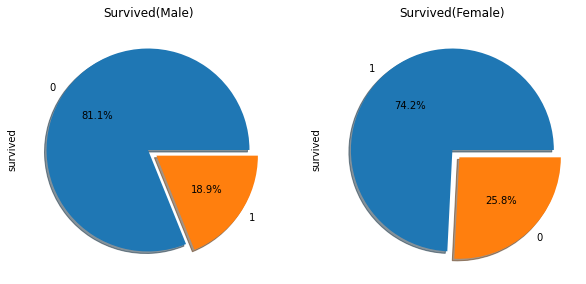

In [ ]:
f,ax = plt.subplots(1,2,figsize = (10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',ax = ax[0],shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%',ax = ax[1],shadow = True)
ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


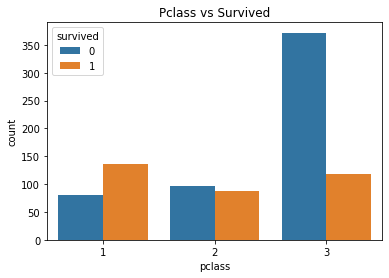

In [ ]:
sns.countplot('pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

In [ ]:
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [ ]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

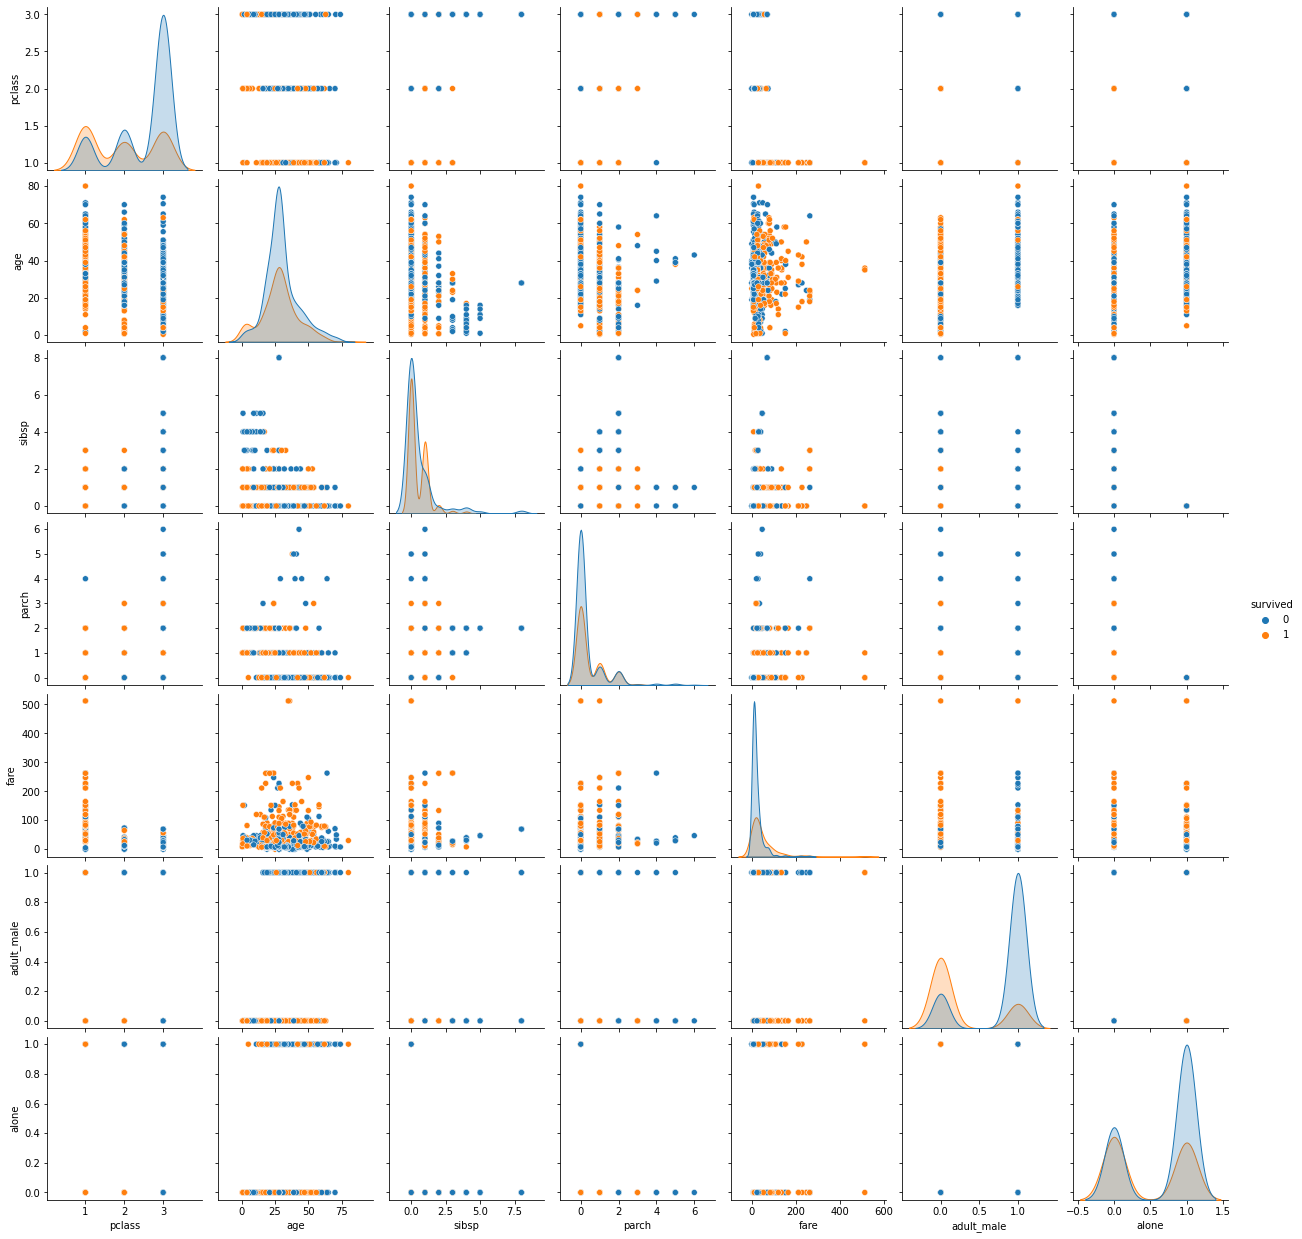

In [ ]:
sns.pairplot(titanic, hue = 'survived') # hue : 종속변수
plt.show()

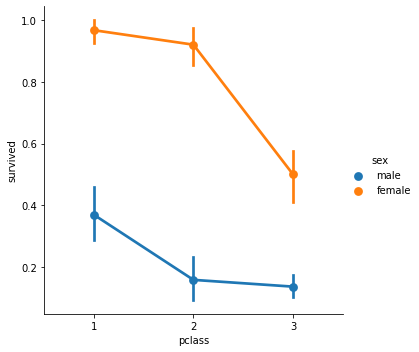

In [ ]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


In [ ]:
titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

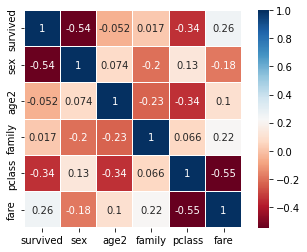

In [ ]:
heatmap_data =  titanic[['survived', 'sex', 'age2','family','pclass','fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths =0.1, vmax= 1.0, square = True, cmap = colormap, linecolor = 'white', annot= True,annot_kws = {"size": 10})
plt.show()

### 영문 텍스트 빈도 분석

In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files

['myCabinetExcelData (8).xls',
 'myCabinetExcelData.xls',
 'myCabinetExcelData (2).xls',
 'myCabinetExcelData (7).xls',
 'myCabinetExcelData (6).xls',
 'myCabinetExcelData (4).xls',
 'myCabinetExcelData (1).xls',
 'myCabinetExcelData (9).xls',
 'myCabinetExcelData (3).xls',
 'myCabinetExcelData (5).xls']

In [ ]:
all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Using big data for big impact: Leveraging anal...,unknown,NELSON PUBLISHING,2011
1,NaN,2,Five Guiding Principles for Realizing the Prom...,"Mantha, B.",The Data Warehouse Institute,2014
2,NaN,3,Imagining big data: Illustrations of “big data...,Christian Pentzold; Cornelia Brantner; Lena Fö...,SAGE PUBLICATIONS LTD,2019
3,NaN,4,"The Big Picture: On Mice, Badges for Your CV, ...","Lazar, N.",Taylor and Francis,2014
4,NaN,5,A Data-Driven Axes Creation Model for Correlat...,"Nakanishi, Takafumi",IOS Press,2014
...,...,...,...,...,...,...
95,NaN,96,From the Editors—Big Data and Data Science Met...,"George, Gerard; Osinga, Ernst C.; Lavie, Do...",ACADEMY OF MANAGEMENT,2016
96,NaN,97,A versatile data-intensive computing platform ...,"Soille, P.; Burger, A.; De Marchi, D.; Kempene...","Elsevier Science B.V., Amsterdam.",2018
97,NaN,98,Busting the big data myths. A backlash against...,"Hick, R.",CENTAUR MEDIA PLC,2014
98,NaN,99,"Dazzled by data: Big Data, the census and urba...","Shearmur, Richard",Taylor and Francis,2015


In [ ]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat.info() #출력하여 내용 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          1000 non-null   int64  
 2   제목          1000 non-null   object 
 3   저자          1000 non-null   object 
 4   출판사         1000 non-null   object 
 5   출판일         1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
all_title = all_files_data_concat['제목']
all_title #출력하여 내용 확인

0      Using big data for big impact: Leveraging anal...
1      Five Guiding Principles for Realizing the Prom...
2      Imagining big data: Illustrations of “big data...
3      The Big Picture: On Mice, Badges for Your CV, ...
4      A Data-Driven Axes Creation Model for Correlat...
                             ...                        
995    Big-data: transformation from heterogeneous da...
996    Big Deal In BI HP's fledgling data warehousing...
997    Big Blue now Big Green: IBM plan to cut data c...
998    Big data in epilepsy: Clinical and research co...
999    Big Opportunities and Big Concerns of Big Data...
Name: 제목, Length: 1000, dtype: object

In [ ]:
stopWords = set(stopwords.words("english")) # 영어 불용어
lemma = WordNetLemmatizer()

In [ ]:
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) # 특수문자 제거
    EnWordsToken = word_tokenize(EnWords.lower()) # 소문자 변환
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 제거
    words.append(EnWordsTokenStopLemma)

In [ ]:
print(words)

[['using', 'big', 'data', 'big', 'impact', 'leveraging', 'analytics', 'provides', 'foundation', 'rethinking', 'impact', 'patient', 'behavior'], ['five', 'guiding', 'principle', 'realizing', 'promise', 'big', 'data'], ['imagining', 'big', 'data', 'illustration', 'big', 'data', 'u', 'news', 'article'], ['big', 'picture', 'mouse', 'badge', 'cv', 'big', 'data', 'backlash'], ['data', 'driven', 'ax', 'creation', 'model', 'correlation', 'measurement', 'big', 'data', 'analytics'], ['data', 'revolution', 'big', 'data', 'open', 'data', 'data', 'infrastructure', 'consequence'], ['good', 'data', 'come', 'small', 'package', 'connecting', 'big', 'data', 'best', 'way', 'marketer', 'extract', 'maximum', 'value', 'say', 'medium', 'iq', 'stewart', 'easterbrook', 'marketer', 'small', 'insightful', 'package', 'likely', 'face', 'big', 'data', 'paralysis'], ['confronting', 'big', 'data', 'applying', 'confrontation', 'clause', 'government', 'data', 'collection'], ['turning', 'big', 'data', 'tiny', 'data', 'c

In [ ]:
words2 = list(reduce(lambda x, y: x+y, words)) # 1차원으로 변환
print(words2) #출력하여 내용 확인

['using', 'big', 'data', 'big', 'impact', 'leveraging', 'analytics', 'provides', 'foundation', 'rethinking', 'impact', 'patient', 'behavior', 'five', 'guiding', 'principle', 'realizing', 'promise', 'big', 'data', 'imagining', 'big', 'data', 'illustration', 'big', 'data', 'u', 'news', 'article', 'big', 'picture', 'mouse', 'badge', 'cv', 'big', 'data', 'backlash', 'data', 'driven', 'ax', 'creation', 'model', 'correlation', 'measurement', 'big', 'data', 'analytics', 'data', 'revolution', 'big', 'data', 'open', 'data', 'data', 'infrastructure', 'consequence', 'good', 'data', 'come', 'small', 'package', 'connecting', 'big', 'data', 'best', 'way', 'marketer', 'extract', 'maximum', 'value', 'say', 'medium', 'iq', 'stewart', 'easterbrook', 'marketer', 'small', 'insightful', 'package', 'likely', 'face', 'big', 'data', 'paralysis', 'confronting', 'big', 'data', 'applying', 'confrontation', 'clause', 'government', 'data', 'collection', 'turning', 'big', 'data', 'tiny', 'data', 'constant', 'size',

In [ ]:
count = Counter(words2)
count #출력하여 내용 확인

Counter({'using': 57,
         'big': 1354,
         'data': 1645,
         'impact': 10,
         'leveraging': 7,
         'analytics': 137,
         'provides': 6,
         'foundation': 3,
         'rethinking': 5,
         'patient': 11,
         'behavior': 2,
         'five': 4,
         'guiding': 2,
         'principle': 1,
         'realizing': 2,
         'promise': 13,
         'imagining': 1,
         'illustration': 1,
         'u': 12,
         'news': 2,
         'article': 4,
         'picture': 13,
         'mouse': 2,
         'badge': 2,
         'cv': 2,
         'backlash': 3,
         'driven': 24,
         'ax': 1,
         'creation': 4,
         'model': 37,
         'correlation': 2,
         'measurement': 6,
         'revolution': 8,
         'open': 20,
         'infrastructure': 12,
         'consequence': 6,
         'good': 7,
         'come': 3,
         'small': 27,
         'package': 3,
         'connecting': 3,
         'best': 9,
         'way': 1

In [ ]:
word_count = dict()
for tag, counts in count.most_common(50): # 상위 50개의 단어
    if(len(str(tag))>1): # 단어 길이가 1보다 큰 것
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
model : 37
health : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
information : 26
framework : 26
application : 25
computing : 25
driven : 24
issue : 24
social : 24
quality : 23
deal : 23
network : 23
use : 22
knowledge : 22
review : 22
efficient : 22
era : 22
storage : 21
healthcare : 21
perspective : 21
service : 21
open : 20
making : 19
survey : 19
process : 19
platform : 19
business : 18
method : 18
large : 18


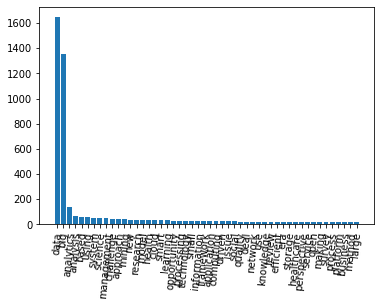

In [ ]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [ ]:
del word_count['big']
del word_count['data']
word_count

{'analysis': 67,
 'analytics': 137,
 'application': 25,
 'approach': 44,
 'based': 62,
 'business': 18,
 'challenge': 47,
 'cloud': 34,
 'computing': 25,
 'deal': 23,
 'driven': 24,
 'efficient': 22,
 'era': 22,
 'framework': 26,
 'health': 37,
 'healthcare': 21,
 'information': 26,
 'issue': 24,
 'knowledge': 22,
 'large': 18,
 'learning': 33,
 'making': 19,
 'management': 48,
 'method': 18,
 'mining': 40,
 'model': 37,
 'network': 23,
 'new': 38,
 'open': 20,
 'opportunity': 31,
 'perspective': 21,
 'platform': 19,
 'process': 19,
 'processing': 30,
 'quality': 23,
 'research': 38,
 'review': 22,
 'science': 50,
 'service': 21,
 'small': 27,
 'smart': 34,
 'social': 24,
 'storage': 21,
 'survey': 19,
 'system': 50,
 'technology': 28,
 'use': 22,
 'using': 57}

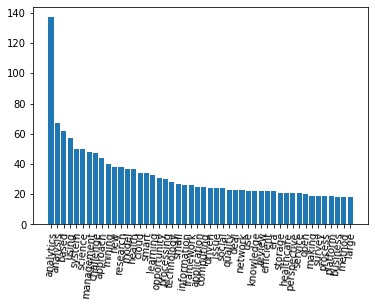

In [ ]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [ ]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year #출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


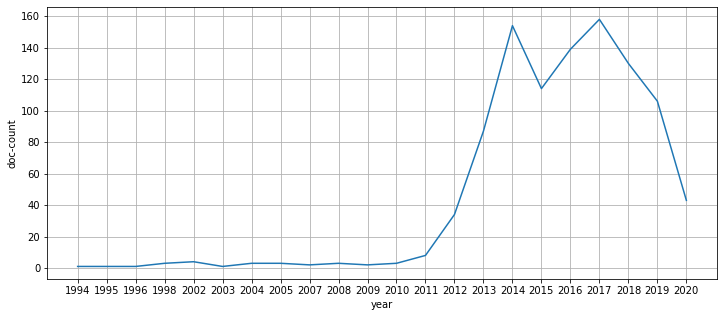

In [ ]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()


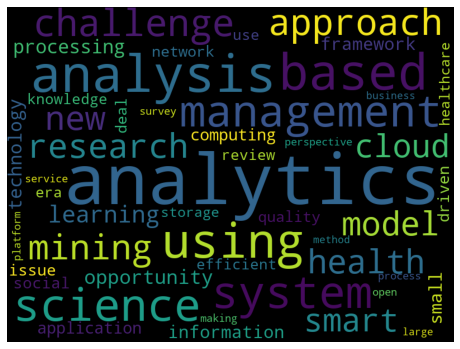

In [ ]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'black', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()